<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Solvers-⚙️" data-toc-modified-id="Solvers-⚙️-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Solvers ⚙️</a></span><ul class="toc-item"><li><span><a href="#1.-Target-engineering" data-toc-modified-id="1.-Target-engineering-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1. Target engineering</a></span></li><li><span><a href="#2.-LogisticRegression-solvers" data-toc-modified-id="2.-LogisticRegression-solvers-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2. LogisticRegression solvers</a></span><ul class="toc-item"><li><span><a href="#🧪-Test-your-code" data-toc-modified-id="🧪-Test-your-code-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>🧪 Test your code</a></span></li></ul></li><li><span><a href="#3.-Stochastic-Gradient-Descent" data-toc-modified-id="3.-Stochastic-Gradient-Descent-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3. Stochastic Gradient Descent</a></span></li><li><span><a href="#4.-Predictions" data-toc-modified-id="4.-Predictions-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>4. Predictions</a></span></li></ul></li><li><span><a href="#🏁--Check-your-code-and-push-your-notebook" data-toc-modified-id="🏁--Check-your-code-and-push-your-notebook-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>🏁  Check your code and push your notebook</a></span></li></ul></div>

# Solvers ⚙️

In this exercise, you will investigate the effects of different `solvers` on `LogisticRegression` models.

👇 Run the code below

In [1]:
import pandas as pd

df = pd.read_csv("data.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality rating
0,9.47,5.97,7.36,10.17,6.84,9.15,9.78,9.52,10.34,8.80,6
1,10.05,8.84,9.76,8.38,10.15,6.91,9.70,9.01,9.23,8.80,7
2,10.59,10.71,10.84,10.97,9.03,10.42,11.46,11.25,11.34,9.06,4
3,11.00,8.44,8.32,9.65,7.87,10.92,6.97,11.07,10.66,8.89,8
4,12.12,13.44,10.35,9.95,11.09,9.38,10.22,9.04,7.68,11.38,3


- The dataset consists of different wines 🍷
- The features describe different properties of the wines 
- The target 🎯 is a quality rating given by an expert

## 1. Target engineering

In this section, you are going to transform the ratings into a binary target.

👇 How many observations are there for each rating?

In [2]:
len(df["quality rating"].unique())

10

👇 Create `y` by transforming the target into a binary classification task where quality ratings below 6 are bad [0], and ratings of 6 and above are good [1]

In [3]:
y = df["quality rating"].apply(lambda x: 0 if x < 6 else 1)

👇 Check the class balance of the new binary target

In [4]:
y.value_counts()

0    50010
1    49990
Name: quality rating, dtype: int64

Create your `X` by scaling the features. This will allow for fair comparison of different solvers.

In [5]:
X = df.drop("quality rating", axis=1)

In [6]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,9.47,5.97,7.36,10.17,6.84,9.15,9.78,9.52,10.34,8.80
1,10.05,8.84,9.76,8.38,10.15,6.91,9.70,9.01,9.23,8.80
2,10.59,10.71,10.84,10.97,9.03,10.42,11.46,11.25,11.34,9.06
3,11.00,8.44,8.32,9.65,7.87,10.92,6.97,11.07,10.66,8.89
4,12.12,13.44,10.35,9.95,11.09,9.38,10.22,9.04,7.68,11.38
...,...,...,...,...,...,...,...,...,...,...
99995,6.93,4.49,8.25,8.60,9.41,11.07,8.38,10.89,12.42,8.99
99996,10.57,9.56,9.83,8.98,9.77,10.04,10.87,11.28,9.57,8.97
99997,10.23,10.98,11.74,11.76,8.87,9.03,9.93,9.86,10.04,8.66
99998,7.25,3.95,7.03,8.90,8.49,9.75,11.45,10.21,8.32,9.44


In [12]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()

rb_scaler.fit(X)

X_scaled = rb_scaler.transform(X)

## 2. LogisticRegression solvers

👇 Logistic Regression models can be optimized using different **solvers**. Find out 
- Which is the `fastest_solver` ?
- What can you say about their respective precision score?

`solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']`
 
For more information on these 5 solvers, check out [this stackoverflow thread](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions)

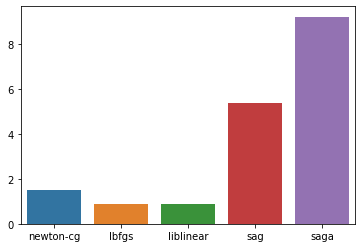

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

import matplotlib.pyplot as plt
import seaborn as sns

fit_time_list = []
precision_list = []
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for solver in solvers:

    model = LogisticRegression(solver=solver, max_iter=500)
    cv = cross_validate(model, X_scaled, y, cv=5, scoring=["precision"])
    fit_time_list.append(cv["fit_time"].sum())
    precision_list.append(cv["test_precision"].mean())

sns.barplot(x=solvers, y=fit_time_list)

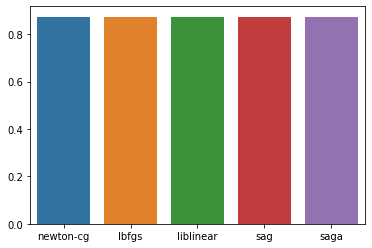

In [20]:
sns.barplot(x=solvers, y=precision_list);

In [21]:
# YOUR ANSWER
fastest_solver = "liblinear"

<details>
    <summary>☝️ Intuition</summary>

All solvers should produce similar precision scores because our cost-function is "easy" enough to have a global minimum which is found by all 5 solvers. For very complex cost-functions such as in Deep Learning, different solvers may stopping at different values of the loss function. 

</details> 

###  🧪 Test your code

In [22]:
from nbresult import ChallengeResult

result = ChallengeResult('solvers',
                         fastest_solver=fastest_solver
                         )
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/Moe/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Moe/code/moe221/data-challenges-moe/05-ML/04-Under-the-hood/02-Solvers
plugins: dash-2.0.0, anyio-3.3.2, cov-3.0.0
collecting ... collected 1 item

tests/test_solvers.py::TestSolvers::test_fastest_solver PASSED           [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/solvers.pickle

git commit -m 'Completed solvers step'

git push origin master


## 3. Stochastic Gradient Descent

Logistic Regression models can also be optimized via Stochastic Gradient Descent.

👇 Evaluate a Logistic Regression model optimized via **Stochastic Gradient Descent**. How do its precision score and training time compare to the performance of the models trained in section 2.?


<details>
<summary>💡 Hint</summary>

- If you are stuck, look at the [SGDClassifier doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)!

</details>



In [23]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier()
cv = cross_validate(model, X_scaled, y, cv=5, scoring=["precision"])
print(cv["fit_time"].sum())
print(cv["test_precision"].mean())

0.7467372417449951
0.885207060869598


☝️ The SGD model should have the shortest training time, for similar performance. This is a direct effect of performing each epoch of the Gradient Descent on a single data point.

## 4. Predictions

👇 Use the best model to predict the binary quality (0 or 1) of the following wine. Store your
- `predicted_class`
- `predicted_proba_of_class`

In [24]:
new_data = pd.read_csv('new_data.csv')

new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,9.54,13.5,12.35,8.78,14.72,9.06,9.67,10.15,11.17,12.17


In [43]:
X_test_scaled = rb_scaler.transform(new_data)

In [44]:
model = SGDClassifier(loss="log")
model.fit(X_scaled, y)

predicted_class = model.predict(X_test_scaled)
predicted_proba_of_class = model.predict_proba(X_test_scaled)[0][0]

In [45]:
f"{predicted_proba_of_class:.9f}"

'0.971948372'

# 🏁  Check your code and push your notebook

In [46]:
from nbresult import ChallengeResult

result = ChallengeResult('new_data_prediction',
    predicted_class=predicted_class,
    predicted_proba_of_class=predicted_proba_of_class
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/Moe/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Moe/code/moe221/data-challenges-moe/05-ML/04-Under-the-hood/02-Solvers
plugins: dash-2.0.0, anyio-3.3.2, cov-3.0.0
collecting ... collected 2 items

tests/test_new_data_prediction.py::TestNewDataPrediction::test_predicted_class PASSED [ 50%]
tests/test_new_data_prediction.py::TestNewDataPrediction::test_predicted_proba PASSED [100%]

============================== 2 passed in 0.14s ===============================


💯 You can commit your code:

git add tests/new_data_prediction.pickle

git commit -m 'Completed new_data_prediction step'

git push origin master
